3D drone coordinates : 
 [[ 312. -186.    0.]
 [ 323. -156.    0.]
 [ 341. -126.    0.]
 [ 368.  -96.    0.]
 [ 427.  -50.    0.]
 [ 467.  -33.    0.]
 [ 486.  -40.    0.]
 [ 491.  -60.    0.]
 [ 481. -113.    0.]
 [ 453. -167.    0.]
 [ 439. -187.    0.]
 [ 418. -209.    0.]
 [ 396. -214.    0.]
 [ 377. -204.    0.]
 [ 351. -180.    0.]
 [ 327. -107.    0.]
 [ 326.  -62.    0.]
 [ 329.  -34.    0.]
 [ 339.  -16.    0.]]


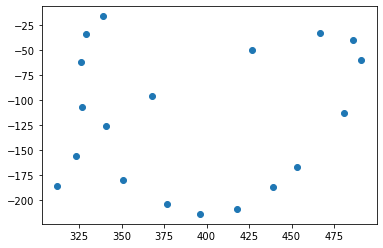

In [7]:
import tkinter as tk
from tkinter import ttk
from tkinter import *
import numpy as np
import math
import matplotlib.pyplot as plt
global arr
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg


class GridCanvas(tk.Canvas):
    def __init__(self, master=None, **kwargs):
        tk.Canvas.__init__(self, master, **kwargs)
        self.grid()
        self.create_grid()

    def create_grid(self):
        for i in range(0, 2000, 20):
            self.create_line([(i, 0), (i, 2000)],fill="#808080", tag='grid_line')
            self.create_line([(0, i), (2000, i)], fill="#808080",tag='grid_line')

class PaintApp(tk.Frame):
    def __init__(self, master=None, **kwargs):
        tk.Frame.__init__(self, master, **kwargs)
        self.canvas = GridCanvas(self, width=2000, height=2000, bg='pink')
        self.canvas.pack(side="top", fill="both", expand=True)
        self.canvas.bind("<B1-Motion>", self.draw)
        self.canvas.bind("<ButtonRelease-1>", self.stop_drawing)
        self.last_x, self.last_y = None, None
        self.x=[]
        self.y=[]
        self.nd=0
        self.plane = ''

    def draw(self, event):
        if self.last_x and self.last_y:
            self.canvas.create_line(self.last_x, self.last_y, event.x, event.y, smooth=True, width=2)
            self.x.append(event.x)  # Append coordinates to the list
            self.y.append(-event.y)
        self.last_x, self.last_y = event.x, event.y
        
        

    def stop_drawing(self, event):
        self.last_x, self.last_y = None, None
        
#     def output(self):
#         self.nd = int(drone_entry.get())
#         self.plane = plane_entry.get()
#         print("nd",self.nd)
        
    

if __name__ == "__main__":
    
        
    
    root = tk.Tk()
    root.title("Titan's GUI for generating 2D drone patterns")
    global plane
    plane=tk.StringVar()
    
    global n_drone
    n_drone=tk.IntVar()
    
    
    app = PaintApp(root)
    

#     ttk.Label(root,text="Hi,Welcome to our GUI Application to generate 2D drone pattern",padding=(30,10))
     

    drone_label=ttk.Label(root,text="Enter the No. of Drones = ")
    drone_label.pack(side="left", anchor="nw")
    drone_entry=ttk.Entry(root,textvariable=n_drone)

#nd=int(drone_entry.get())
    drone_entry.pack(side="left", anchor="nw")
    drone_entry.focus()


    plane_label=ttk.Label(root,text="Enter the Plane: ")
    plane_label.pack(side="left", anchor="nw")
    
    plane_entry=ttk.Entry(root,textvariable=plane)
    plane_entry.pack(side="left", anchor="nw")
    plane_entry.focus()
    
#     def Call():
#         nd=int(n_drone.get())
#         Plane=plane.get()

#         print("No. of drones = ",nd,type(nd))
#         print("Plane is ", plane,type(plane))
    
#     call=ttk.Button(root,text="call : ",command=Call)
#     call.pack(side="top", anchor="nw")
    
    nd=int(drone_entry.get())
    Plane=plane_entry.get()
    
    



    min_dist = 20

    def distance(p1, p2):
        return math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

    def reduce_points(points, min_dist):
        """Reduce a list of points such that any two points do not have distance less than dist_min."""
        reduced_points = []
        for point in points:
            add_point = True
            for p in reduced_points:
                if distance(point, p) < min_dist:
                    add_point = False
                    break
            if add_point:
                reduced_points.append(point)
        return reduced_points
    def importance(points):
        """Calculate the importance of each point based on its local area"""
        n = len(points)
        areas = np.zeros(n)
        for i in range(1, n-1):
            x1, y1 = points[i-1]
            x2, y2 = points[i]
            x3, y3 = points[i+1]
            areas[i] = abs((x2-x1)*(y3-y1) - (x3-x1)*(y2-y1)) / 2
        return areas

    def simplify(points, k):
        """Simplify the curve to k points using the Visvalingam-Whyatt algorithm"""
        n = len(points)

        if n <= k:
            return points
        areas = importance(points)

        while len(points) > k:
            # Find the point with the smallest importance
            i = np.argmin(areas[1:-1]) + 1
            # Remove the point and update the areas
            points = np.delete(points, i, axis=0)
            areas = np.delete(areas, i)
            if i > 1:
                areas[i-1] = importance([points[i-2], points[i-1], points[i]])[1]
            if i < len(points)-1:
                areas[i] = importance([points[i-1], points[i], points[i+1]])[1]
        return points




    coordinate_button=ttk.Button(root,text="Download and Quit: ",command=root.destroy)
    coordinate_button.pack(side="top", anchor="nw")
    download_label=ttk.Label(root,text="Click here to download the txt file of drone coordinates in 3D space")
    download_label.pack(side="top", anchor="nw")


#     quit_button=ttk.Button(root,text="Quit",command=root.destroy)
#     quit_button.pack(side="left", anchor="sw")


#     l.pack(side="top")
#     w.pack()

    
    
    app = PaintApp(root)
    app.pack(side="top", fill="both", expand=True)
    root.mainloop()
    
    
    Arr=np.transpose([app.x,app.y])
    nd=int(n_drone.get())
#     print("after root ",nd)
    
    Plane=plane.get()
#     print("after root ",Plane)
    
    arr=np.array(Arr)
#     plt.scatter(arr[:, 0],arr[:, 1])
    
    
    points = np.array(reduce_points(arr, min_dist))

    simplified = simplify(points, nd)
    
    r=len(simplified)
#     print(simplified)
    #print(r)
    plt.scatter(simplified[:, 0],simplified[:, 1])
      #Print the simplified points
    ans = np.zeros((r, 3))

    if Plane=='xy'or Plane=='yx':
        for i in range(r):
            ans[i,0]=simplified[i,0]
            ans[i,1]=simplified[i,1]
            ans[1,2]=0



    if Plane=='yz'or Plane=='zy':
        for i in range(r):
            ans[i,0]=0
            ans[i,1]=simplified[i,0]
            ans[i,2]=simplified[i,1]


    if Plane=='zx'or Plane=='xz':
        for i in range(r):
            ans[i,0]=simplified[i,0]
            ans[i,1]=0
            ans[i,2]=simplified[i,1]

    np.savetxt("3D_drone_coordinates.txt", ans)
    print("3D drone coordinates : \n",ans)












root = tk.Tk()
root.title("2D Drone-Coordinates plot")

# Step 3: Create a Matplotlib figure and plot
fig = plt.Figure(figsize=(5, 4), dpi=100)
ax = fig.add_subplot(111)
ax.scatter(simplified[:, 0],simplified[:, 1])
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_title("2D Drone-Coordinates Plot")

# Step 4: Create a FigureCanvasTkAgg object
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.draw()
canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

# Step 5: Create Tkinter GUI components
# ...

# Step 6: Start Tkinter event loop
root.mainloop()
